In [1]:
%%HTML
<script src="require.js"></script>

In [2]:
from IPython.display import HTML
HTML('''<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script><script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

<div align="center">
<img src="Figures/Title.png" />
</div>

<div style="background-color: #270f47; color: #eed47c; padding: 15px; text-align: left; border-radius: 5px;">

# I. Abstract

</div>

In this report, we aim to determine the different 

<div style="background-color: #270f47; color: #eed47c; padding: 15px; text-align: left; border-radius: 5px;">

# II. Introduction

</div>

**Understanding Cryptocurrency**

In recent years, trading in cryptocurrency has started to gain traction among many traders. 
However, the field, in itself, could be obscure especially for new traders trying to learn more about it and trying to penetrate the trading market. 
Before we discuss more about trading in cryptocurrency, let us discuss first what cryptocurrency is. 
There are a lot of things that we can say about cryptocurrency, but we will only be talking about the basic things that beginner traders need to know. 

Cryptocurrency is a type of digital money that is not issued or governed by any central authority like a government or bank. 
Usually, they are considered an alternative asset and investment where many people buy them to hold in hopes of the value appreciating over time (CryptoCrafted, 2025).
When trading, everyone has to deal with a trading pair which consists of two currencies: base currency and quote currency. 
The base currency represents the asset  being bought or sold.
The quote currency is used to express the value or price of one unit of the base currency.
For example, in a BTC-USDT pair, Bitcoin (BTC) is the base currency and Tether (USDT) is the quote currency, meaning the price shows how many USDT are needed to buy one BTC. 
Understanding which currency is the base and which is the quote is essential for traders to accurately interpret prices, calculate profits and losses, and manage risk (Bitcoin.com, 2025, MK Manoylov, 2024). 

To further expound, quote currencies are classified into three main categories: fiat-backed stablecoins, crypto-collaterized stablecoins, and non-stable quote currencies (Kraken Learn team, 2024). 
Fiat-backed stablecoins are pegged to traditional government-issued currencies like the US dollar or the Euro. 
This is so maintain price stability. 
Crypto-collateralized stablecoins are backed by other cryptocurrencies held in reserve to provide security and liquidity. 
Non-stable quote currencies are the ones with the most volatile price behavior. 
Good traders know which ones to choose to match their risk appetite, stability needs, and trading strategies within the crypto market. 

**Understanding Binance**

For traders to participate in trading cryptocurrency, usually they have to go through a platform in order to buy, sell, and trade Bitcoin, Ethereum, and other altcoins. 
One of the known and popular platforms is Binance. 
According to BSO Editorial (2023), Binance is one of the largest cryptocurrency exchanges in the world.
They offer the trading services for a wide range of digital assets and 530 crypto-to-crypto trading pairs alongside futures contracts for various cryptocurrencies.

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Problem Statement

</div>

For first time users, it is hard to trading in cryptocurrency could be challenging.
There are a lot of options to choose from, and a lot of quote currencies that could potentially change the value of your currencies. 
In this report, we want to answer the question: **For a first-time investor, how do the volatility, price stability, and trading activity patterns differ among the available different cryptocurrencies and their quote currencies?**

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Motivation

</div>

We do not have prior knowledge about cryptocurrency and Binance. 
Despite this, we wanted to do this study because we want to give data-driven guidance for beginner traders like us. 
As mentioned earlier, the Binance platform offers a vast array of options, making it difficult for beginners to understand which assets are stable, which are volatile, and when the best times to trade are. 
By analyzing historical data, we seek to uncover patterns that can inform smarter, less risky trading decisions. 
Ultimately, we want to transform complex market data into actionable insights that can help first-time users build confidence and develop effective trading strategies.

<div style="background-color: #270f47; color: #eed47c; padding: 15px; text-align: left; border-radius: 5px;">

# III. Methodology Overview

</div>

<div align="center">
<img src="Figures/Methodology Overview.png" />
</div>

**Figure 1.** Methodology Overview

Figure 1 shows the methodology overview of this study.
Our methodology consists of a four step process starting with the collection of historical Binance data, followed by exploratory data analysis, data processing, and the results and discussion. 
Below would be a short summary of each of the different steps:
1. **Data Collection**: Here, we collect publicly available historical Binance data focusing on the closing price. Since the dataset is very big, we stored it in a Spark DataFrame.
2. **Exploratory Data Analysis**: Here, we prepared and cleaned the dataset to ensure that it is suitable for further analysis. EDA is used to understand the behavior of the closing price for different classifications: base currencies, quote currencies, and even their classifications. We filtered out base currencies with fewer than eight quote currencies to ensure meaningful comparisons. Correlation analyses were conducted to examine relationships between base currency returns across different quote currencies and among base currencies within the same quote currency. 
3. **Data Processing**: In this step, we want to get answers for our research problem which is to find out the volatility, price stability, and trading activity patterns among the three classifications: cryptocurrency, fiat-based tokens, and stablecoin. Annual volatility was computed using the standard deviation of daily log returns, scaled by the square root of 365, to identify fluctuations and trends. We also explored the relationship between trading volume and returns to detect patterns in market participation and trading behavior for different base currencies.
4. **Results and Discussion**: Based on what we find, we want to discuss what this could mean for investors, mention our perceived benefits and disadvantages, and recommend further steps. Afterwards, we will summarize findings in the recommendations and conclusion section.

A more specific and detailed description of the different steps and diagrams would be provided in their respective sections.

<div style="background-color: #270f47; color: #eed47c; padding: 15px; text-align: left; border-radius: 5px;">

# IV. Data Collection

</div>

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Data Source

</div>

We gathered data from the Binance Full History dataset available on the Jojie-collected public datasets of the Asian Institute of Management. 
The directory is as follows: `/mnt/data/public/binance-full-history`.
This dataset consists of more than 30 Parquet files that correspond to the information per base currency in its quote currency.
The dataset, as a whole, takes up 33 GB of data, so it would not be feasible to use the typical Python operations to handle all of it. 
Instead, we used Apache Spark, and created a Spark DataFrame just to contain all the information we need.

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Data Description

</div>

The following features are consistent within all Parquet files in the Binance Full History dataset:

| Feature Name | Data Description | Data Type |
|-------------|-----------------|-----------|
| open | Opening price of the trading period | float |
| high | Highest price during the trading period | float |
| low | Lowest price during the trading period | float |
| close | Closing price of the trading period | float |
| volume | Total volume of base asset traded | float |
| quote_asset_volume | Total volume of quote asset traded | float |
| number_of_trades | Total number of trades executed | integer |
| taker_buy_base_asset_volume | Volume of base asset bought by takers | float |
| taker_buy_quote_asset_volume | Volume of quote asset bought by takers | float |
| open_time | Timestamp when the trading period started | timestamp_ntz |

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Data Collection and DataFrame Creation

</div>

Since there are a lot of files, and the entire dataset sums to a total of 33 GB, we had to use Apache Spark to handle the data. 
To summarize the code below, we created a Spark DataFrame from all the information available.
Here, we created new features: `base_currency`, `quote_currency`, and `classification`. 
These three are not anywhere in the previously shown data dictionary because they are information you can only get from the file names of the Parquet files.

In [23]:
# standard imports
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import glob
import os
import numpy as np
from functools import reduce
import math

# spark imports
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType
from pyspark.sql.window import Window
from pyspark.sql.functions import col, split, when, lit,  to_date, row_number
from pyspark.sql.functions import regexp_extract, input_file_name
from pyspark.sql.functions import year, month, dayofmonth, to_date
from pyspark.sql.functions import sum as spark_sum
from matplotlib.colors import LinearSegmentedColormap

# scipy imports
from scipy.stats import spearmanr

In [4]:
# Directory containing the parquet files
directory = '/mnt/data/public/binance-full-history'
files = [f for f in os.listdir(directory) if f.endswith('.parquet')]

base_quote_counts = {}

for file in files:
    base_currency = file.split('-')[0]
    quote_currency = file.split('-')[1].replace('.parquet', '')

    if base_currency not in base_quote_counts:
        base_quote_counts[base_currency] = set()

    base_quote_counts[base_currency].add(quote_currency)

base_counts = {base: len(quotes) for base, quotes in base_quote_counts.items()}

counts_df = pd.DataFrame({
    'base_currency': list(base_counts.keys()),
    'quote_count': list(base_counts.values())
})

quote_count_distribution = counts_df['quote_count'].value_counts().sort_index()

# plotting
plt.figure(figsize=(15, 8))
bars = plt.bar(quote_count_distribution.index, quote_count_distribution.values)

for bar in bars:
    bar.set_color('#bba9de')
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2., height + 0.1,
        f'{int(height)}', ha='center', va='bottom'
    )

plt.xlabel('Number of Quote Currencies')
plt.ylabel('Number of Base Currencies')
plt.title('Distribution of Base Currencies by Number of Quote Currencies')
plt.grid(axis='x', alpha=0)
plt.xticks(quote_count_distribution.index)

plt.tight_layout()
plt.savefig('Figures/Distribution_of_base_quote.png')
plt.close()

top_bases = counts_df.nlargest(10, 'quote_count')
common_quotes = set.intersection(
    *(base_quote_counts[base] for base in top_bases['base_currency'])
)

<div align="center">
<img src="Figures/Distribution_of_base_quote.png"/>
</div>

**Figure 2.** Distribution of the number of base currencies per number of quote currency.

To put in other words, Figure 2 shows the number of base currencies that have $n$ amount of quote currencies.
As seen here, there are a lot of base currencies that can only be traded with one quote currency.
Since we want to do a comparative analysis on the different quote currencies and their relationship to the base currency, we will only look at the base currencies with at least 8 quote currencies.
This is to ensure that they have some quote currencies in common which can help us understand the relationship between both factors more. 
This cuts down on a lot of irrelevant data that are not important to our analysis and makes this more computationally efficient. 

In [5]:
# Initialize Spark Session
spark = SparkSession.builder.appName("TopBasesAnalysis").getOrCreate()

# Getting only target files
file_data = []
for base in top_bases['base_currency']:
    for quote in common_quotes:
        file_name = f"{base}-{quote}.parquet"
        file_path = os.path.join(directory, file_name)
        if os.path.exists(file_path):
            file_data.append((file_path, base, quote))

# Define classification mapping
classification_map = {
    'stablecoin': ['BUSD', 'USDT'],
    'fiat': ['EUR']
}

# Create DataFrames for each file and add columns
dfs = []
for file_path, base, quote in file_data:
    df = spark.read.parquet(file_path)
    df = (
        df.withColumn("base_currency", lit(base))
        .withColumn("quote_currency", lit(quote))
        .withColumn(
            "classification",
            when(lit(quote).isin(classification_map['stablecoin']), lit('stablecoin'))
            .when(lit(quote).isin(classification_map['fiat']), lit('fiat'))
            .otherwise(lit('cryptocurrency'))
        )
    )
    dfs.append(df)

# Union all DataFrames
spark_df = reduce(lambda df1, df2: df1.union(df2), dfs)

The schema, also features, of the new Spark DataFrame is as follows:

| Feature | Description | Data Type |
|---------|-------------|-----------|
| open | Opening price of the trading period | float |
| high | Highest price during the trading period | float |
| low | Lowest price during the trading period | float |
| close | Closing price of the trading period | float |
| volume | Total trading volume in base currency | float |
| quote_asset_volume | Total trading volume in quote currency | float |
| number_of_trades | Total number of trades executed during the period | integer |
| taker_buy_base_asset_volume | Volume of base asset bought by takers (market orders) | float |
| taker_buy_quote_asset_volume | Volume of quote asset bought by takers (market orders) | float |
| open_time | Timestamp indicating the start of the trading period | timestamp_ntz |
| base_currency | The base currency in the trading pair (e.g., BTC, ETH) | string |
| quote_currency | The quote currency in the trading pair (e.g., USDT, BUSD) | string |
| classification | Classification of the quote currency (stablecoin/fiat/cryptocurrency) | string |

In [6]:
# Getting the number of null values
null_counts_pd = spark_df.select([
    spark_sum(col(c).isNull().cast("int")).alias(c)
    for c in spark_df.columns
]).toPandas().T

null_counts_pd.columns = ["number of null entries"]
null_counts_pd

,number of null entries
open,0
high,0
low,0
close,0
volume,0
quote_asset_volume,0
number_of_trades,0
taker_buy_base_asset_volume,0
taker_buy_quote_asset_volume,0
open_time,0


Based on the results above, there seems to be no null values, so we do not have to handle any null values in the dataset.

<div style="background-color: #270f47; color: #eed47c; padding: 15px; text-align: left; border-radius: 5px;">

# V. Exploratory Data Analysis

</div>

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Base Currencies per Quote Currency by Year

</div>

In [7]:
# Work with Spark DataFrame
df = spark_df

# Add a column for the year extracted from open_time
df_with_year = df.withColumn("year", F.year("open_time"))

# Count distinct base currencies per quote currency per year
quote_base_counts = (
    df_with_year
    .groupBy("year", "quote_currency")
    .agg(F.countDistinct("base_currency").alias("n_base_currencies"))
)

# Filter for target quote currencies
target_quotes = ["USDT", "BUSD", "EUR"]
quote_filtered = quote_base_counts.filter(F.col("quote_currency").isin(target_quotes))

# Convert to Pandas DataFrame for plotting and sort by year
plot_df = quote_filtered.toPandas().sort_values("year")

# Set Seaborn style and create the figure
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

# Plot line chart of number of base currencies over time per quote currency
sns.lineplot(
    data=plot_df,
    x="year",
    y="n_base_currencies",
    hue="quote_currency",
    marker="o"
)

# Customize plot
plt.title("Number of Base Currencies per Quote Currency Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Base Currencies")
plt.ylim(0, 10.5)
plt.xticks(sorted(plot_df["year"].unique()))
plt.grid(axis='y', alpha=0.3)

# Save figure
save_path = "Figures/Base Currencies per Quote Currency (Line Chart).png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.close()

print("Saved to:", save_path)

Saved to: Figures/Base Currencies per Quote Currency (Line Chart).png


The code above was generated using ChatGPT. It took around 16 seconds to load.

<div align="center">
<img src="Figures/Base Currencies per Quote Currency (Line Chart).png" />
</div>

**Figure 3.** The number of base currencies per quote currencies over time.

Figure 3 shows how many distinct base currencies exist within each quote currency (USDT, EUR, and BUSD) across all years of the given data. Initially, it could be observed that USDT is the only quote currency that exists in the years 2017 and 2018. Beyond that, more quote currencies are considered in with BUSD emerging in 2019 and EUR coming in 2020. 
An article by Binance mentions that on February 3, 2019, the company announced a Launchpad project for the first time, and this event started the "*IEO (Initial Exchange Offering) wave*" that brought a rise in the number of assets being listed on the website (Binance, 2024). 
Furthermore, as the timeline leads into 2022, the market structure matures as the number of base currencies under BUSD and EUR increases.
By the conclusion of the timeline, all quote currencies have 10 base currencies under their title.

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Correlation of Base Currency Returns Across Target Quote Pairs 

</div>

In [17]:
# Compute returns with lag over each base-quote pair
w = Window.partitionBy("base_currency", "quote_currency").orderBy("open_time")

df_returns = (
    spark_df
    .withColumn("year", F.year("open_time"))
    .withColumn("prev_close", F.lag("close").over(w))
    .withColumn(
        "return",
        (F.col("close") - F.col("prev_close")) / F.col("prev_close")
    )
    .filter(F.col("prev_close").isNotNull())
)

# Use this order so A,B,C = BUSD, EUR, USDT
target_quotes = ["BUSD", "EUR", "USDT"]

# Collect sets of quotes each base trades against
bases_with_quotes = (
    df_returns
    .filter(F.col("quote_currency").isin(target_quotes))
    .groupBy("base_currency")
    .agg(F.collect_set("quote_currency").alias("quotes"))
)

# Keep only bases that have all 3 quotes
bases_complete = (
    bases_with_quotes
    .filter(F.size("quotes") == len(target_quotes))
    .select("base_currency")
    .toPandas()["base_currency"]
    .tolist()
)

if len(bases_complete) < 3:
    raise ValueError(
        f"Not enough bases with all {target_quotes}. \
        Found only: {bases_complete}"
    )

# Select specific bases if valid
desired_bases = ["ADA", "ETH", "BTC"]
base_by_row = [b for b in desired_bases if b in bases_complete]

if len(base_by_row) < 3:
    raise ValueError(
        f"One or more of {desired_bases} do not have all {target_quotes} pairs. "
        f"Valid bases with all quotes are: {bases_complete}"
    )

# Labels for plotting rows
row_labels = [
    f"Base 1: {base_by_row[0]}",
    f"Base 2: {base_by_row[1]}",
    f"Base 3: {base_by_row[2]}",
]

# Filter for selected bases and target quotes
df_sel = (
    df_returns
    .filter(F.col("base_currency").isin(base_by_row))
    .filter(F.col("quote_currency").isin(target_quotes))
)

df_small = df_sel.filter(F.minute("open_time") == 0)

# Convert to pandas and sort
pdf = (
    df_small
    .select("open_time", "year", "quote_currency", "base_currency", "return")
    .toPandas()
)
pdf = pdf.sort_values(["year", "quote_currency", "open_time"])

years = list(range(2017, 2023))

# Create subplots
n_rows, n_cols = 3, len(years)
fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(4 * n_cols, 4 * n_rows),
    squeeze=False,
    sharex=True,
    sharey=True
)

# Loop over bases and years to plot correlation heatmaps
for i, base in enumerate(base_by_row):
    for j, year in enumerate(years):
        ax = axes[i, j]

        sub = pdf[
            (pdf["base_currency"] == base) &
            (pdf["year"] == year) &
            (pdf["quote_currency"].isin(target_quotes))
        ]

        # If no data, create blank grid
        if sub.empty:
            ax.set_xticks(range(len(target_quotes)))
            ax.set_yticks(range(len(target_quotes)))
            ax.set_xticklabels(target_quotes, fontsize=10)
            ax.set_yticklabels(target_quotes, fontsize=10)
            ax.tick_params(axis="x", labelrotation=0)

            for pos in range(len(target_quotes)+1):
                ax.axhline(pos - 0.5, color="white", linewidth=0.5)
                ax.axvline(pos - 0.5, color="white", linewidth=0.5)

            ax.set_xlim(-0.5, len(target_quotes)-0.5)
            ax.set_ylim(len(target_quotes)-0.5, -0.5)

            for spine in ax.spines.values():
                spine.set_visible(False)

            continue

        # Pivot data for correlation calculation
        wide = sub.pivot_table(
            index="open_time",
            columns="quote_currency",
            values="return"
        ).reindex(columns=target_quotes)

        corr = wide.corr()

        # If correlation is all NaN, draw empty grid
        if corr.isna().all().all():
            ax.set_xticks(range(len(target_quotes)))
            ax.set_yticks(range(len(target_quotes)))
            ax.set_xticklabels(target_quotes, fontsize=10)
            ax.set_yticklabels(target_quotes, fontsize=10, rotation=0)
            ax.tick_params(axis="x", labelrotation=90)

            for pos in range(len(target_quotes)+1):
                ax.axhline(pos - 0.5, color="white", linewidth=0.5)
                ax.axvline(pos - 0.5, color="white", linewidth=0.5)

            ax.set_xlim(-0.5, len(target_quotes)-0.5)
            ax.set_ylim(len(target_quotes)-0.5, -0.5)
            continue

        # Plot heatmap
        sns.heatmap(
            corr,
            vmin=-1, vmax=1,
            cmap="RdYlGn",
            annot=True,
            fmt=".2f",
            xticklabels=target_quotes,
            yticklabels=target_quotes,
            ax=ax,
            cbar=False,
            linewidths=0.5,
            linecolor="white"
        )

        ax.set_xticklabels(target_quotes, fontsize=10)
        ax.set_yticklabels(target_quotes, fontsize=10)
        ax.tick_params(axis="x", labelrotation=90)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_title("")

# Add titles for columns
for j, year in enumerate(years):
    axes[0, j].set_title(f"Year: {year}", fontsize=16)

# Add row labels for bases
for i, label in enumerate(row_labels):
    ax0 = axes[i, 0]
    ax0.set_ylabel(label, fontsize=14, rotation=90, labelpad=40)
    ax0.yaxis.set_label_coords(-0.15, 0.5)
    ax0.yaxis.label.set_rotation(90)

plt.suptitle(
    'Correlation Matrix of the Behavior of Quote Currencies',
    fontweight='bold'
)
plt.tight_layout(rect=[0, 0, 0.90, 1])

# Add colorbar
norm = plt.Normalize(-1, 1)
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
fig.colorbar(sm, cax=cbar_ax)

# Save the figure
save_path = (
    "Figures/Correlation of Returns Across Three Random Base Currencies "
    "Across Target Quote Pairs.png"
)
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.close()

print("Saved to:", save_path)


Saved to: Figures/Correlation of Returns Across Three Random Base Currencies Across Target Quote Pairs.png


The code above was generated using ChatGPT. It took around a minute for the code to load.

<div align="center">
<img src="Figures/Correlation of Returns Across Three Random Base Currencies Across Target Quote Pairs.png" />
</div>

**Figure 4.** Behavior of the quote currencies of selected base currencies.

The correlation plots in Figure 4 describe the relationship between the returns of three random base coins (ADA, BTC, and ETH) and fixed quote currencies (BUSD, EUR, and USDT) throughout all years of the dataset. 
In connection with the previous column chart analysis, some cells within the correlation plots of years 2017, 2018, and 2019 are left empty because the expansion of Binance assets did not occur until 2019. 
Given that all of the correlation cells are closer to the value of 1.00 (colored by a shade of green), the value of the base coin's return gives a small difference when there is a change in the quote currency. 
This is clearly shown in the correlation plots of BTC and ETH in years 2021 and 2022 wherein all the correlation values lie within the range of 0.95 to 1.00. 
For ADA, some explanations for its relatively lower correlations could be that:
1. The market of the base coin has not matured enough yet. This is evident when the correlation plots of the base coins in earlier years are observed. Lesser users engaging with the specific coin means lesser data for correlation value, therefore the values in consideration are more sensitive to randomness. 
2. Difference in macroeconomic conditions. More specifically, the value of EUR is tied to the real world currency of Europe, the *Euro*. This means that the value of any cryptocurrency tied to EUR could transitively be affected by changes in the Euro, which could cause the return behavior to deivate from those tied to US currencies (USDT and BUSD).

Given that most of the correlation plots show similar results, the return values of the base currency do not have a strong dependency on the quote currency. Differing quote currencies usually have the same behavior when under the same base currency.

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Correlation of Returns Across Base Currencies for each Quote

</div>

In [18]:
# Labels for rows based on target quotes
quote_row_labels = [
    f"Quote 1: {target_quotes[0]}",
    f"Quote 2: {target_quotes[1]}",
    f"Quote 3: {target_quotes[2]}",
]

# Set up figure dimensions
n_rows_2 = len(target_quotes)
n_cols_2 = len(years)

fig2, axes2 = plt.subplots(
    nrows=n_rows_2,
    ncols=n_cols_2,
    figsize=(4 * n_cols_2, 4 * n_rows_2),
    squeeze=False,
    sharex=True,
    sharey=True
)

# Loop over quotes and years to plot correlation heatmaps
for i, quote in enumerate(target_quotes):  # row = quote
    for j, year in enumerate(years):       # col = year
        ax = axes2[i, j]

        sub = pdf[
            (pdf["quote_currency"] == quote) &
            (pdf["year"] == year) &
            (pdf["base_currency"].isin(base_by_row))
        ]

        # If no data, create empty grid
        if sub.empty:
            ax.set_xticks(range(len(base_by_row)))
            ax.set_yticks(range(len(base_by_row)))
            ax.set_xticklabels(base_by_row, fontsize=10, rotation=90)
            ax.set_yticklabels(base_by_row, fontsize=10, rotation=0)

            for pos in range(len(base_by_row) + 1):
                ax.axhline(pos - 0.5, color="white", linewidth=0.5)
                ax.axvline(pos - 0.5, color="white", linewidth=0.5)

            ax.set_xlim(-0.5, len(base_by_row) - 0.5)
            ax.set_ylim(len(base_by_row) - 0.5, -0.5)

            for spine in ax.spines.values():
                spine.set_visible(False)
            continue

        # Pivot data for correlation calculation
        wide = sub.pivot_table(
            index="open_time",
            columns="base_currency",
            values="return"
        ).reindex(columns=base_by_row)

        corr = wide.corr()

        # If correlation is all NaN, draw empty grid
        if corr.isna().all().all():
            ax.set_xticks(range(len(base_by_row)))
            ax.set_yticks(range(len(base_by_row)))
            ax.set_xticklabels(base_by_row, fontsize=10, rotation=90)
            ax.set_yticklabels(base_by_row, fontsize=10, rotation=0)

            for pos in range(len(base_by_row) + 1):
                ax.axhline(pos - 0.5, color="white", linewidth=0.5)
                ax.axvline(pos - 0.5, color="white", linewidth=0.5)

            ax.set_xlim(-0.5, len(base_by_row) - 0.5)
            ax.set_ylim(len(base_by_row) - 0.5, -0.5)
            continue

        # Plot heatmap
        sns.heatmap(
            corr,
            vmin=-1,
            vmax=1,
            cmap="RdYlGn",
            annot=True,
            fmt=".2f",
            xticklabels=base_by_row,
            yticklabels=base_by_row,
            ax=ax,
            cbar=False,
            linewidths=0.5,
            linecolor="white"
        )

        ax.tick_params(axis="y")
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_title("")

# Add year titles to top row
for j, year in enumerate(years):
    axes2[0, j].set_title(f"Year: {year}", fontsize=14)

# Rotate y-axis labels
for i in range(n_rows_2):
    axes2[i, 0].tick_params(axis="y", labelrotation=90)

# Add row labels for quotes
for i, label in enumerate(quote_row_labels):
    ax0 = axes2[i, 0]

    # If this row has no heatmap, turn on axis but hide frame
    if not axes2[i, 0].has_data():
        ax0.set_axis_on()
        ax0.set_frame_on(False)
    else:
        # Heatmap axis → keep base ticks
        ax0.tick_params(axis='y', labelsize=12)

    # Set quote label
    ax0.set_ylabel(label, fontsize=14, rotation=90, labelpad=40)
    ax0.yaxis.set_label_coords(-0.10, 0.5)

plt.suptitle(
    'Correlation Matrix of the Behavior of Base Currencies',
    fontweight='bold'
)
plt.tight_layout(rect=[0, 0, 0.90, 1])

# Add colorbar
norm2 = plt.Normalize(-1, 1)
sm2 = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm2)
sm2.set_array([])
cbar_ax2 = fig2.add_axes([0.92, 0.1, 0.02, 0.8])
fig2.colorbar(sm2, cax=cbar_ax2)

# Save the figure
save_path2 = (
    "Figures/Correlation of Returns Across Three Random Base Currencies "
    "Within Each Target Quote.png"
)
plt.savefig(save_path2, dpi=300, bbox_inches="tight")
plt.close()

print("Saved flipped correlation figure to:", save_path2)

Saved flipped correlation figure to: Figures/Correlation of Returns Across Three Random Base Currencies Within Each Target Quote.png


The code above was generated using ChatGPT. It took around 7 seconds to load.

<div align="center">
<img src="Figures/Correlation of Returns Across Three Random Base Currencies Within Each Target Quote.png" />
</div>

**Figure 5.** Behavior of the base currencies relative to the quote currencies.

In comparison to Figure 4, the correlation plots in Figure 5 describe how the base currencies move relative to each other when paired with the same quote currency. 
First, it could be noticed that there is a slow increase in the correlations of all the base currencies as the years pass. 
As these cryptocurrency markets mature, the behavior of the base currencies becomes more similar as they gain more user activity (liquidity).
Looking closer into the plots, it could be noticed that across all quote currencies, the correlation between BTC and ETH is stronger than that of BTC and ADA. 
What this hints is that the movement of ADA deviates somewhat by differing/broader market factors, but the overall movement of these three base currencies is the same nonetheless. 

<div style="background-color: #270f47; color: #eed47c; padding: 15px; text-align: left; border-radius: 5px;">

# VI. Data Processing

</div>

In this portion, we are trying to fulfill our goals where we compare volatility, price stability, and trading activity patterns.

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Volatility Comparison

</div>

In [10]:
def calculate_volatility_measures(
    spark_df,
    output_dir='Figures',
    rolling_window_days=30,
    annualization_factor=np.sqrt(365),
    min_rolling_obs=10
):
    """
    Calculate daily log returns and volatility measures (annualized and 
    rolling) for each base-quote pair in a Spark DataFrame. Generates and 
    saves plots for annual and rolling volatilities.
    """
    os.makedirs(output_dir, exist_ok=True)

    # Extract date from open_time
    spark_daily = spark_df.withColumn('date', to_date('open_time'))

    # Keep only last observation per day per base-quote
    rn_window = (
        Window.partitionBy('base_currency', 'quote_currency', 'date')
        .orderBy(F.col('open_time').desc())
    )
    spark_daily = (
        spark_daily
        .withColumn('_rn', row_number().over(rn_window))
        .filter(col('_rn') == 1)
        .drop('_rn')
    )

    # Lag previous close to calculate log returns
    lag_window = Window.partitionBy(
        'base_currency', 'quote_currency'
    ).orderBy('date')
    spark_daily = (
        spark_daily
        .withColumn('prev_close', F.lag('close').over(lag_window))
        .withColumn(
            'log_return',
            F.when(
                F.col('prev_close').isNotNull(),
                F.log(col('close') / col('prev_close'))
            ).otherwise(F.lit(None)),
        )
    )
    spark_daily = spark_daily.filter(col('log_return').isNotNull())
    spark_daily = spark_daily.withColumn('year', F.year(F.col('date')))

    # Compute annual volatility per base-quote
    annual_vol_df = (
        spark_daily
        .groupBy('base_currency', 'quote_currency', 'year', 'classification')
        .agg(
            (F.stddev('log_return') * F.lit(annualization_factor))
            .alias('annual_volatility'),
            F.count('log_return').alias('n_days')
        )
        .filter(col('annual_volatility').isNotNull())
        .orderBy('base_currency', 'quote_currency', 'year')
    )

    # Compute rolling volatility
    rolling_w = (
        Window.partitionBy('base_currency', 'quote_currency')
        .orderBy('date')
        .rowsBetween(-(rolling_window_days - 1), 0)
    )
    spark_daily = spark_daily.withColumn(
        'rolling_std', F.stddev('log_return').over(rolling_w)
    )
    spark_daily = spark_daily.withColumn(
        'rolling_vol_annualized',
        F.when(
            F.col('rolling_std').isNotNull(),
            F.col('rolling_std') * F.lit(annualization_factor),
        ).otherwise(None)
    )

    # Count observations in rolling window
    count_w = rolling_w
    spark_daily = spark_daily.withColumn(
        'rolling_count', F.count('log_return').over(count_w)
    )
    spark_daily = spark_daily.withColumn(
        'rolling_vol_annualized',
        F.when(
            col('rolling_count') >= min_rolling_obs, col('rolling_vol_annualized')
        )
        .otherwise(F.lit(None))
    )

    # Convert to pandas for plotting
    annual_vol_pd = annual_vol_df.toPandas()
    rolling_pd = (
        spark_daily
        .select(
            'base_currency',
            'quote_currency',
            'date',
            'rolling_vol_annualized',
            'rolling_count',
            'classification'
        )
        .toPandas()
    )

    # Plot annual volatility per base currency
    try:
        base_list = sorted(annual_vol_pd['base_currency'].unique())
        n_plots = min(len(base_list), 10)
        cols = 5
        rows = math.ceil(n_plots / cols)
        fig, axes = plt.subplots(
            rows, cols, figsize=(cols * 5, rows * 4), sharex=True, sharey=True
        )
        axes = axes.flatten()
        all_years = sorted(annual_vol_pd['year'].unique())

        if len(all_years) == 0:
            print("No annual data to plot.")
        else:
            for i, base in enumerate(base_list[:n_plots]):
                ax = axes[i]
                bdf = annual_vol_pd[annual_vol_pd['base_currency'] == base]
                for quote in sorted(bdf['quote_currency'].unique()):
                    qdf = bdf[bdf['quote_currency'] == quote]
                    ax.plot(
                        qdf['year'], qdf['annual_volatility'], 
                        marker='o', label=quote
                    )
                ax.set_title(f'{base} as Base Currency')
                ax.set_xticks(all_years)
                ax.set_ylim(0, 3)
                ax.grid(alpha=0.3)
                ax.legend(fontsize=8)

            # Hide unused axes
            for j in range(n_plots, len(axes)):
                axes[j].set_visible(False)

            plt.suptitle(
                'Annual Volatility by Base Currency (per quote)',
                fontsize=14, fontweight='bold', y=0.98
            )
            fig.supylabel('Annual Volatility (Standard Deviation)')
            fig.supxlabel('Years')
            plt.tight_layout(rect=[0.015, 0.01, 1, 0.97])
            out1 = os.path.join(output_dir, 'annual_volatility_by_year.png')
            plt.savefig(out1, dpi=300, bbox_inches='tight')
            plt.close()
            print("Saved:", out1)
    except Exception as e:
        print("Plotting annual volatility failed:", e)

    # Plot rolling volatility examples for top base-quote pairs
    try:
        counts = (
            rolling_pd.groupby(['base_currency', 'quote_currency'])
            .size()
            .reset_index(name='n')
        )
        top_series = counts.sort_values('n', ascending=False).head(4)
        fig, axes = plt.subplots(len(top_series), 1, figsize=(12, 3 * len(top_series)))
        if len(top_series) == 1:
            axes = [axes]

        for ax, (_, row) in zip(axes, top_series.iterrows()):
            base = row['base_currency']
            quote = row['quote_currency']
            ser = rolling_pd[
                (rolling_pd['base_currency'] == base) &
                (rolling_pd['quote_currency'] == quote)
            ].sort_values('date')
            ax.plot(
                ser['date'], ser['rolling_vol_annualized'], marker='.', linewidth=1
            )
            ax.set_title(
                f'Rolling {rolling_window_days}-day annualized vol: {base}-{quote}'
            )
            ax.set_ylabel('Annualized vol')
            ax.set_xlabel('Date')
            ax.grid(True, alpha=0.3)

        plt.tight_layout()
        out2 = os.path.join(output_dir, 'rolling_volatility_examples.png')
        plt.savefig(out2, dpi=300, bbox_inches='tight')
        plt.close()
        print("Saved:", out2)
    except Exception as e:
        print("Plotting rolling volatility failed:", e)

    return annual_vol_pd, rolling_pd


# Run the function
annual_volatility_df, rolling_volatility_df = calculate_volatility_measures(
    spark_df
)


Saved: Figures/annual_volatility_by_year.png
Saved: Figures/rolling_volatility_examples.png


The code above was generated with ChatGPT.

<div align="center">
<img src="Figures/annual_volatility_by_year.png" />
</div>

**Figure 6.** The annual volatility of each quote currency per base currency for every year.

Figure 6 above shows that the annual volatility for each base and quote currency pair per year.
To recall, a base currency are the available cryptocurrencies you can invest in.
A few popular examples are Bitcoin, Dogecoin, and even Hawk Tuah coin.
A quote currency is a way to value the base currency.
Annual volatility was chosen for computational efficiency since we only want to compare a per-year basis.

The annual volatility was calculated by getting the standard deviation of daily log returns and scaling it by the square root of 365.
This is a way to measure risk and to see how volatile each cryptocurrency pair has been over time.
Higher volatility values indicated greater price fluctuations and higher risk. 
Lower values suggest more stable price behavior.
The plot reveals that some currencies maintain relatively consistent volatility across years, while others show significant spikes during certain periods, potentially corresponding to market events, adoption phases, or broader economic conditions affecting the cryptocurrency markets.

In terms of different quote currencies, it shows that upon introduction, there is a significant difference in terms of volatility.
Usually, when they are newly introduced, there is less volatility compared to the existing quote currencies.

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Volume-Volatility Relationship

</div>

In [11]:
def analyze_volume_volatility(spark_df, output_dir='Figures', randomseed=42):
    """
    Analyze volume–return relationships for randomly selected base and quote
    currencies and generate a 3x3 grid of scatter plots with shared axes.
    """
    os.makedirs(output_dir, exist_ok=True)

    # Get date from timestamp
    spark_daily = spark_df.withColumn('date', to_date('open_time'))

    # Keep only the last observation per day for each base-quote pair
    rn_window = (
        Window.partitionBy('base_currency', 'quote_currency', 'date')
        .orderBy(F.col('open_time').desc())
    )

    spark_daily = (
        spark_daily
        .withColumn('_rn', row_number().over(rn_window))
        .filter(col('_rn') == 1)
        .drop('_rn')
    )

    # Compute daily returns
    lag_window = (
        Window.partitionBy('base_currency', 'quote_currency')
        .orderBy('date')
    )

    spark_daily = (
        spark_daily
        .withColumn('prev_close', F.lag('close').over(lag_window))
        .withColumn(
            'return',
            F.when(
                F.col('prev_close').isNotNull(),
                (col('close') - col('prev_close')) / col('prev_close')
            ).otherwise(None)
        )
    )

    # Filter out rows where return is null
    spark_daily = spark_daily.filter(col('return').isNotNull())

    # Convert to pandas for plotting
    volume_volatility_df = spark_daily.select(
        'base_currency', 'quote_currency', 'date', 'volume', 'return'
    ).toPandas()

    # Randomly select 3 quotes and 3 bases for plotting
    rng = np.random.default_rng(randomseed)
    quotes = volume_volatility_df['quote_currency'].unique()
    selected_quotes = rng.choice(
        quotes,
        size=min(3, len(quotes)),
        replace=False
    )
    bases = volume_volatility_df['base_currency'].unique()
    selected_bases = rng.choice(
        bases,
        size=min(3, len(bases)),
        replace=False
    )

    # plotting
    fig, axes = plt.subplots(
        3, 3,
        figsize=(18, 14),
        sharex=True,
        sharey=True
    )

    for i, base in enumerate(selected_bases):
        for j, quote in enumerate(selected_quotes):
            ax = axes[i, j]

            data = volume_volatility_df[
                (volume_volatility_df['base_currency'] == base)
                & (volume_volatility_df['quote_currency'] == quote)
            ]

            if data.empty:
                ax.text(0.5, 0.5, "No data", ha='center', va='center')
                ax.set_axis_off()
                continue

            returns = data['return']
            volumes = data['volume']

            ax.scatter(volumes, returns, alpha=0.6, s=10, c='#bba9de')
            ax.set_ylim(-1, 1)
            ax.set_xlim(0, 10000)

            if i == 0:
                ax.set_title(f"Quote Currency: {quote}")

            if j == 0:
                ax.set_ylabel(f"Base Currency: {base}")

            corr, pval = spearmanr(volumes, returns)

            ax.text(
                0.05,
                0.95,
                f'r={corr:.2f}\np={pval:.3f}',
                transform=ax.transAxes,
                va='top',
                fontsize=9,
                bbox=dict(
                    boxstyle='round',
                    facecolor='wheat',
                    alpha=0.75
                )
            )

            ax.grid(True, alpha=0.3)

    fig.text(0.5, 0.04, "Daily Volume", ha='center', fontsize=13)
    
    plt.suptitle(
        "Volume vs Return Across Selected Base and Quote Currencies",
        fontsize=18,
        fontweight='bold'
    )
    fig.supylabel('Daily Returns', x=0.01)

    plt.tight_layout(rect=[0.05, 0.05, 1, 0.96])

    out_path = os.path.join(output_dir, "volume_return_3x3.png")
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.close()

    print(f"Figure saved to: {out_path}")

    return volume_volatility_df

volume_volatility_df = analyze_volume_volatility(spark_df)

Figure saved to: Figures/volume_return_3x3.png


The code above was generated with ChatGPT.

<div align="center">
<img src="Figures/volume_return_3x3.png" />
</div>

**Figure 7.** The annual volatility of each quote currency per base currency for every year.
                                                                            
As seen in Figure 7, the plots of volume and returns, it seems that the volume of stocks has no direct correlation to its returns. 
This is also consistent for different base and quote currency pairs. 
However, it seems that there is a set trading patten for different base currencies. 
For example, for the LTC base cryptocurrency, usually people trade it in lower daily volumes, but there are varying returns.
This could suggest:
1. Lower market participation for LTC pairs
2. Different trader behavior or investment time horizons for this base currency
3. Potential for higher volatility due to thinner markets

The volume patterns suggest that there are cryptocurrencies that could have unique market microstructure characteristics that persist regardless of the quote currency being traded against.

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Hourly Trading Trends

</div>

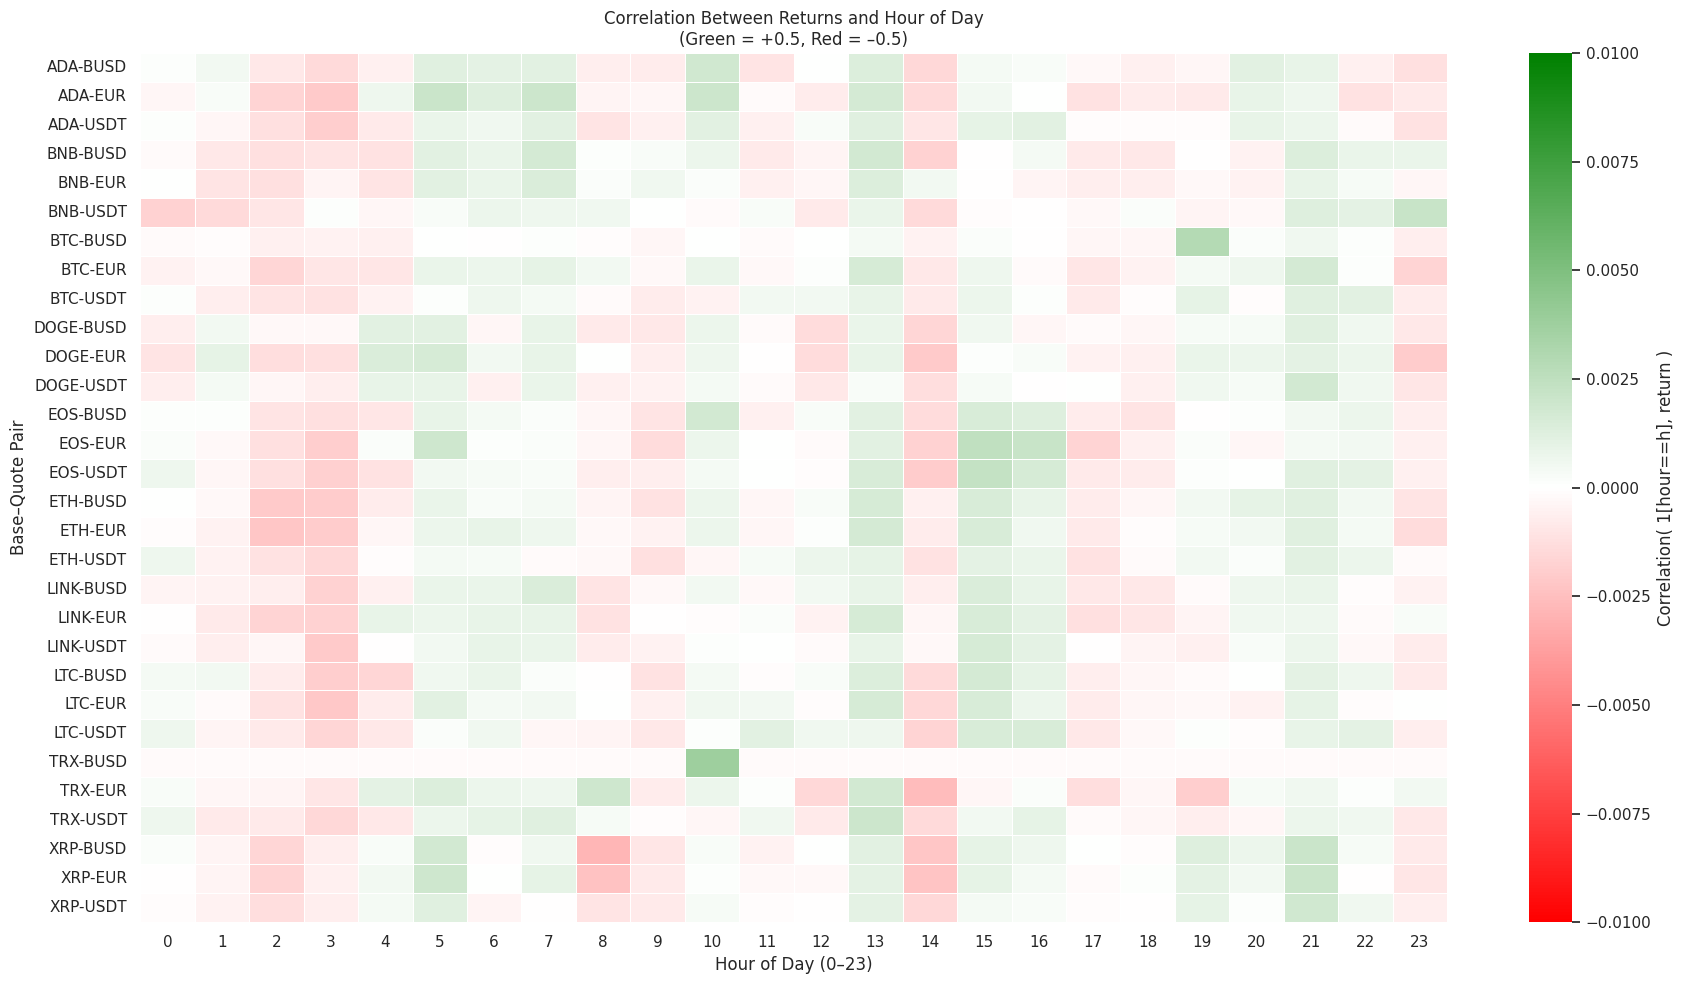

In [22]:
# 1) Per-candle return + hour + pair
w = Window.partitionBy("base_currency", "quote_currency").orderBy("open_time")

df_returns = (
    spark_df
    .withColumn("pair", F.concat_ws("-", "base_currency", "quote_currency"))
    .withColumn("hour_of_day", F.hour("open_time"))
    .withColumn("prev_close", F.lag("close").over(w))
    .filter(F.col("prev_close").isNotNull())
    .withColumn("ret",
                (F.col("close") - F.col("prev_close")) / F.col("prev_close"))
    .select("pair", "hour_of_day", "ret")
)

# 2) Overall stats per pair: n, sum(ret), sum(ret^2)
overall_stats = (
    df_returns
    .groupBy("pair")
    .agg(
        F.count("*").alias("n"),
        F.sum("ret").alias("sum_y"),
        F.sum(F.pow(F.col("ret"), 2)).alias("sum_y2")
    )
)

# 3) Per-hour stats per pair: n_h, sum(ret at that hour)
hour_stats = (
    df_returns
    .groupBy("pair", "hour_of_day")
    .agg(
        F.count("*").alias("n_h"),
        F.sum("ret").alias("sum_y_h")
    )
)

# 4) Join and compute corr( 1[hour==h], ret ) analytically
stats = hour_stats.join(overall_stats, on="pair", how="inner")

stats = (
    stats
    # probabilities and expectations
    .withColumn("p", F.col("n_h") / F.col("n"))
    .withColumn("Ey", F.col("sum_y") / F.col("n"))
    .withColumn("Ey2", F.col("sum_y2") / F.col("n"))
    .withColumn("Exy", F.col("sum_y_h") / F.col("n"))
    # covariance and variances
    .withColumn("cov", F.col("Exy") - F.col("p") * F.col("Ey"))
    .withColumn("varx", F.col("p") - F.col("p") * F.col("p"))
    .withColumn("vary", F.col("Ey2") - F.col("Ey") * F.col("Ey"))
    # correlation
    .withColumn(
        "corr",
        F.when((F.col("varx") <= 0) | (F.col("vary") <= 0),
               F.lit(None).cast("double"))
         .otherwise(F.col("cov") / F.sqrt(F.col("varx") * F.col("vary")))
    )
    # clip to [-0.5, 0.5]
    .withColumn(
        "corr_clipped",
        F.when(F.col("corr") > 0.5, 0.5)
         .when(F.col("corr") < -0.5, -0.5)
         .otherwise(F.col("corr"))
    )
)

# 5) Bring only the small correlation table to pandas
pdf_corr = (
    stats
    .select("pair", "hour_of_day", "corr_clipped")
    .toPandas()
)

# Pivot into heatmap shape: rows = pair, cols = hour 0–23
heatmap_df = pdf_corr.pivot(
    index="pair",
    columns="hour_of_day",
    values="corr_clipped"
)

# Ensure all 24 hours are present as columns (0–23)
all_hours = list(range(24))
for h in all_hours:
    if h not in heatmap_df.columns:
        heatmap_df[h] = np.nan

heatmap_df = heatmap_df[all_hours].sort_index()

# 6) Plot heatmap
colors = ["red", "white", "green"]
custom_cmap = LinearSegmentedColormap.from_list("rwg", colors, N=256)

plt.figure(figsize=(18, 10))
sns.heatmap(
    heatmap_df,
    cmap=custom_cmap,
    vmin=-0.01, vmax=0.01,
    linewidths=0.4,
    cbar_kws={"label": "Correlation( 1[hour==h], return )"}
)

plt.title("Correlation Between Returns and Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Base–Quote Pair")
plt.tight_layout()
plt.show()

<div style="background-color: #270f47; color: #eed47c; padding: 15px; text-align: left; border-radius: 5px;">

# VII. Results and Discussion

</div>

The analysis we've done on base and quote currencies reveal interesting patterns in market structure and liquidity over time. 
Figure 3 shows that there was gradual diversification in the Binance market.
Initially, USDT dominated as a common quote currency, but the emergence of BUSD in 2019 and EUR in 2020 reflects key market developments including the rise of Binance's Launchpad projects. 
This diversification corresponds with increased maturity in the cryptocurrency ecosystem, as more base currencies become accessible under multiple quote currencies. 
Correlation analyses (Figures 4 and 5) further suggest that the returns of base currencies are largely independent of the quote currency used, with high correlations observed for major coins like BTC and ETH. 
Notably, ADA exhibits lower correlations in early years, likely reflecting lower liquidity and sensitivity to broader macroeconomic factors such as fluctuations in the Euro, demonstrating how market maturity and external economic conditions can influence individual assets.

Volatility and trading patterns also provide additional insights into market behavior (Figures 6 and 7). 
While some base currencies maintain stable annual volatility, others experience pronounced spikes, likely due to market events or adoption cycles. 
Newly introduced quote currencies initially show lower volatility, suggesting gradual integration into trading activity. 
Additionally, trading volume does not consistently predict returns, as seen in LTC, which experiences low daily volume but variable returns. 
This indicates unique market microstructure characteristics for certain cryptocurrencies, including variations in trader behavior, liquidity, and market participation. 

Now, you may be thinking, **"What does this have to do with first time traders? Why should we care about this? 
Is there anything here that concerns us (them) at all?"** 
Well, the patterns we’ve observed can actually offer some practical takeaways for first-time traders. 
For one, understanding that the returns of major cryptocurrencies like BTC and ETH are largely independent of the quote currency means that new traders don’t necessarily have to worry about which quote currency to choose for these assets—the performance will generally be similar. 
However, for less established coins like ADA, the lower correlations and higher sensitivity to external factors suggest that trading these assets may carry more unpredictable risks, especially in the early years of their market presence. 
Recognizing that volatility varies not just across coins but also across quote currencies can guide first-time traders in choosing pairs that match their risk tolerance.

<div style="background-color: #270f47; color: #eed47c; padding: 15px; text-align: left; border-radius: 5px;">

# VIII. Conclusion and Recommendations

</div>

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Conclusion

</div>

**Traders' Digest**

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Recommendations

</div>

**Business Implications of Our Report**

From a beginner trader's perspective, our study can serve as a data-driven guide for knowing how to navigate trading on the Binance platform.
We clearly gave the differences on both the quote and base currency and how these can affect trading strategies. 
At the end, we were able to suggest a general framework for a trading strategy for the base-quote pairs we inspected in Binance.
Although it is not a full trading strategy yet, it can be a guide for future work or for future traders.

**Limitations of the Study**

Due to time and computational constraints, we were not able to apply more advanced analyses on the different base and quote currency pairs.
The data was also limited from 2017 until 2022. 
Hence, there is a chance that our analyses and predictions could be out of date.
2022 was three years ago, so it is necessary that these tests be done again on more recent data, if available. 
Furthermore, we are clearly not as experienced in Binance as the average trader, so we were learning more about the platform along the way.
There was a great learning curve that we had to address just to understand the terms that we discussed in this report.


**Recommendations for Future Works**
  
Aligned to our limitations, we would highly recommend that the same analyses would be done on more recent data (if available).
The last date in our dataset is in the year 2022, which is three years ago.
Updated data is crucial for more accurate predictions and analyses on the behavior of the base and quote currency pairs on Binance.
For future work, we'd recommend that people do topological data analysis (TDA) on the relationships between the different base and quote currency pairs.
There is abundant data, and there are also a lot of currencies to choose from, so doing TDA would be a great way to visualize the latent relationships between the trading options available on binance. 
Furthermore, looking at the relationship between different base currencies with only available quote currency would be interesting to find out. 
Lastly, if we had more time, it would have been interesting to generate portfolios or a trading strategy at least for the different base-quote cryptocurrency pairs.
This would have shown a great application of our learnings.

<div style="background-color: #270f47; color: #eed47c; padding: 15px; text-align: left; border-radius: 5px;">

# IX. References

</div>

Binance. (2024). 幣安七載風華，一朝雲起龍蟠！探索改變全球加密貨幣市場的七年征途 [Binance’s seven-year journey: How Binance has changed the global crypto market]. Retrieved November 23, 2025, from https://www.binance.com/en/square/post/10784043486617

Bitcoin.com. (2025). *Base and Quote Currency Explained*. Bitcoin.com Markets. https://markets.bitcoin.com/glossary/base-and-quote-currency

BSO Editorial. (2023). *What is Binance?* BSO. https://www.bso.co/glossary/what-is-binance

CryptoCrafted. (2025, May 2). *What is Cryptocurrency? The Ultimate Beginner’s Guide*. https://www.cryptocrafted.org/what-is-cryptocurrency

Kraken Learn team. (2024, December 18). *Types of Cryptocurrency | Kraken*. https://www.kraken.com/learn/types-of-cryptocurrency

MK Manoylov. (2024, August 30). *Beginner’s guide to cryptocurrency trading: different pair types*. The Block. https://www.theblock.co/learn/286332/beginners-guide-to-cryptocurrency-trading-different-pair-types

<div style="background-color: #270f47; color: #eed47c; padding: 15px; text-align: left; border-radius: 5px;">

# X. Supplementary

</div>

This portion just contains code that was created, but not really focused or talked about in the previous sections because it did not really help with carrying out the narrative of the report.

**Disclaimer**: Some code in this section have been commented out because they took a long time to run on Jojie, but the outputs are displayed with some description attached.

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Total File Size

</div>

In [13]:
# # Getting the total size of files
# total_size_bytes = 0

# for base_currency in top_bases['base_currency']:
#     for quote_currency in common_quotes:
#         file_name = f"{base_currency}-{quote_currency}.parquet"
#         if file_name in files:
#             file_path = os.path.join(directory, file_name)
#             total_size_bytes += os.path.getsize(file_path)

# # Convert totals
# total_size_mb = total_size_bytes / (1024 * 1024)
# total_size_gb = total_size_bytes / (1024 * 1024 * 1024)

# # Calculate all-file totals
# total_all_files_bytes = sum(os.path.getsize(os.path.join(directory, f)) for f in files)
# total_all_files_gb = total_all_files_bytes / (1024 * 1024 * 1024)

# # Output
# print(f"{'TOTAL (Top Bases + Common Quotes)':<35} {total_size_gb:>8.2f} GB ({total_size_mb:>.1f} MB)")
# print(f"{'Percentage of All Data':<35} {(total_size_gb/total_all_files_gb)*100:>8.1f}%")
# print(f"{'TOTAL (All Files)':<35} {total_all_files_gb:>8.2f} GB")

<div style="color: #270f47; padding: 15px; text-align: left; border-radius: 5px;">

## Closing Prices per Base Currency per Year

</div>

In [14]:
# # Create output directory
# output_dir = 'Figures'
# os.makedirs(output_dir, exist_ok=True)

# # Extract year from open_time and convert to date for better plotting
# spark_df = spark_df.withColumn("year", year("open_time"))
# spark_df = spark_df.withColumn("date", to_date("open_time"))

# # Get unique years and base currencies
# years = [row['year'] for row in spark_df.select("year").distinct().collect()]
# years.sort()
# base_currencies = [
#     row['base_currency'] for row in spark_df.select("base_currency").distinct().collect()
# ]

# print(f"Years available: {years}")
# print(f"Base currencies: {base_currencies}")

# # For each base currency, create a figure with subplots for each year
# for base_currency in base_currencies:
#     print(f"Processing {base_currency}...")

#     # Filter data for the current base currency
#     currency_df = spark_df.filter(spark_df.base_currency == base_currency)

#     # Create figure with 2 rows, 3 columns (for up to 6 years)
#     fig, axes = plt.subplots(2, 3, figsize=(15, 10))
#     axes = axes.flatten()

#     # Get available years for this currency and sort them
#     currency_years = [row['year'] for row in currency_df.select("year").distinct().collect()]
#     currency_years.sort()

#     # Plot each year in a separate subplot
#     for i, year_val in enumerate(currency_years):
#         if i >= 6:
#             break

#         # Filter data for the specific year
#         year_data = currency_df.filter(currency_df.year == year_val)

#         # Convert to pandas for plotting
#         pandas_df = year_data.select("date", "close", "quote_currency").toPandas()

#         # Plot each quote currency as a separate line
#         ax = axes[i]
#         for quote_currency in pandas_df['quote_currency'].unique():
#             quote_data = pandas_df[pandas_df['quote_currency'] == quote_currency]
#             quote_data = quote_data.sort_values('date')
#             ax.plot(
#                 quote_data['date'],
#                 quote_data['close'],
#                 label=quote_currency,
#                 linewidth=1,
#                 alpha=0.7
#             )

#         ax.set_title(f'{base_currency} - {year_val}', fontsize=12, fontweight='bold')
#         ax.set_xlabel('Date')
#         ax.set_ylabel('Closing Price')
#         ax.tick_params(axis='x', rotation=45)
#         ax.legend(fontsize=8)
#         ax.grid(True, alpha=0.3)

#     # Hide empty subplots if we have fewer than 6 years
#     for i in range(len(currency_years), 6):
#         axes[i].set_visible(False)

#     plt.tight_layout()

#     # Save the figure
#     filename = os.path.join(output_dir, f'{base_currency}_volatility_comparison.png')
#     plt.savefig(filename, dpi=300, bbox_inches='tight')
#     plt.close()

#     print(f"Saved: {filename}")

# print("All volatility comparison plots have been generated!")